<a href="https://colab.research.google.com/github/Savith-02/notebooks/blob/main/MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset, random_split
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Define the neural network (same as before)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
# Load and preprocess the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

full_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Select only 100 images
indices = torch.randperm(len(full_dataset))[:100]
dataset = Subset(full_dataset, indices)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4250009.69it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1229292.31it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 8224802.99it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5333294.73it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
# Split into train and validation sets
train_size = 80
val_size = 20
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)


In [5]:
# Plot some sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, (img, label) in enumerate(train_dataset):
    if i >= 10:  # We'll show the first 10 images
        break
    ax = axes[i//5, i%5]
    ax.imshow(img.squeeze().numpy(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.tight_layout()
plt.savefig('sample_images.png')
plt.close()


In [6]:
# Initialize the model, loss function, and optimizer
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())


In [7]:
# Training loop
num_epochs = 50
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            val_loss += criterion(output, target).item()
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')


Epoch 1/50, Train Loss: 2.1442, Val Loss: 2.1171
Epoch 2/50, Train Loss: 1.6430, Val Loss: 1.7940
Epoch 3/50, Train Loss: 1.1841, Val Loss: 1.5473
Epoch 4/50, Train Loss: 0.8348, Val Loss: 1.2075
Epoch 5/50, Train Loss: 0.6254, Val Loss: 1.0402
Epoch 6/50, Train Loss: 0.3895, Val Loss: 0.8851
Epoch 7/50, Train Loss: 0.2897, Val Loss: 0.7549
Epoch 8/50, Train Loss: 0.1989, Val Loss: 0.5992
Epoch 9/50, Train Loss: 0.1258, Val Loss: 0.5425
Epoch 10/50, Train Loss: 0.1003, Val Loss: 0.5659
Epoch 11/50, Train Loss: 0.0680, Val Loss: 0.4930
Epoch 12/50, Train Loss: 0.0548, Val Loss: 0.4708
Epoch 13/50, Train Loss: 0.0342, Val Loss: 0.4645
Epoch 14/50, Train Loss: 0.0287, Val Loss: 0.4576
Epoch 15/50, Train Loss: 0.0236, Val Loss: 0.4834
Epoch 16/50, Train Loss: 0.0190, Val Loss: 0.4639
Epoch 17/50, Train Loss: 0.0154, Val Loss: 0.4495
Epoch 18/50, Train Loss: 0.0135, Val Loss: 0.4448
Epoch 19/50, Train Loss: 0.0117, Val Loss: 0.4507
Epoch 20/50, Train Loss: 0.0104, Val Loss: 0.4608
Epoch 21/

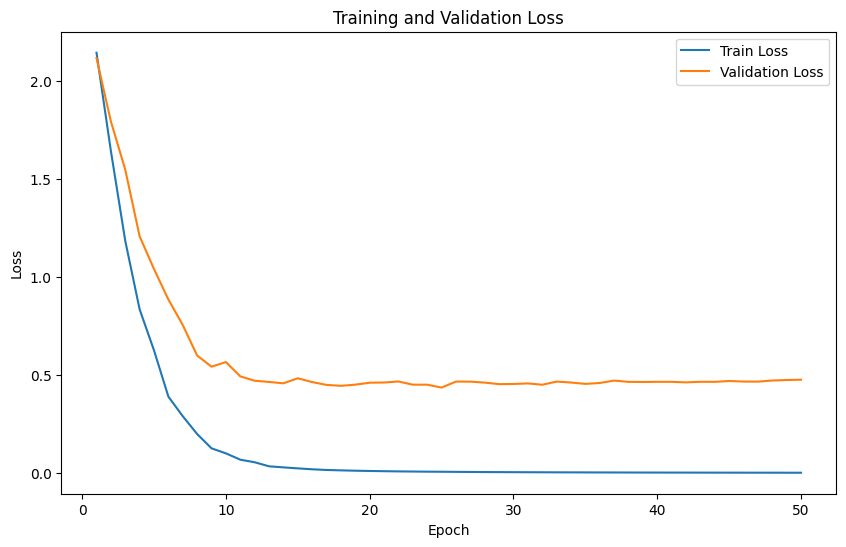

In [10]:
# Plot loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
plt.close()


In [8]:
# Test the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in val_loader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f'Accuracy on the validation set: {100 * correct / total:.2f}%')

# Save the model
# torch.save(model.state_dict(), 'mnist_model.pth')
print("Model saved as 'mnist_model.pth'")
print("Sample images saved as 'sample_images.png'")
print("Loss curves saved as 'loss_curves.png'")

Accuracy on the validation set: 80.00%
Model saved as 'mnist_model.pth'
Sample images saved as 'sample_images.png'
Loss curves saved as 'loss_curves.png'
